In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.ets import AutoETS
from sktime.utils.plotting.forecasting import plot_ys
from sktime.forecasting.model_selection import temporal_train_test_split

from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

In [2]:
acres_df = pd.read_csv('./claire_data/California_Fire_Perimeters.csv')

In [3]:
acres_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12202 entries, 0 to 12201
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OBJECTID      12202 non-null  int64  
 1   YEAR_         12140 non-null  float64
 2   STATE         12148 non-null  object 
 3   AGENCY        12202 non-null  object 
 4   UNIT_ID       12199 non-null  object 
 5   FIRE_NAME     12174 non-null  object 
 6   INC_NUM       11720 non-null  object 
 7   ALARM_DATE    8214 non-null   object 
 8   CONT_DATE     3375 non-null   object 
 9   CAUSE         12190 non-null  float64
 10  COMMENTS      1886 non-null   object 
 11  REPORT_AC     3836 non-null   float64
 12  GIS_ACRES     12202 non-null  float64
 13  C_METHOD      3759 non-null   float64
 14  OBJECTIVE     12146 non-null  float64
 15  FIRE_NUM      10952 non-null  object 
 16  GlobalID      12202 non-null  object 
 17  SHAPE_Length  12202 non-null  float64
 18  SHAPE_Area    12202 non-nu

In [4]:
acres_df.dropna(subset=['YEAR_'], inplace=True)

In [5]:
acres_df = acres_df[(acres_df['YEAR_'] > 1970) & (acres_df['GIS_ACRES'] > 100)]

In [6]:
acres_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6086 entries, 0 to 12201
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OBJECTID      6086 non-null   int64  
 1   YEAR_         6086 non-null   float64
 2   STATE         6032 non-null   object 
 3   AGENCY        6086 non-null   object 
 4   UNIT_ID       6083 non-null   object 
 5   FIRE_NAME     6068 non-null   object 
 6   INC_NUM       5924 non-null   object 
 7   ALARM_DATE    5526 non-null   object 
 8   CONT_DATE     3252 non-null   object 
 9   CAUSE         6074 non-null   float64
 10  COMMENTS      1079 non-null   object 
 11  REPORT_AC     3207 non-null   float64
 12  GIS_ACRES     6086 non-null   float64
 13  C_METHOD      3351 non-null   float64
 14  OBJECTIVE     6057 non-null   float64
 15  FIRE_NUM      4930 non-null   object 
 16  GlobalID      6086 non-null   object 
 17  SHAPE_Length  6086 non-null   float64
 18  SHAPE_Area    6086 non-null

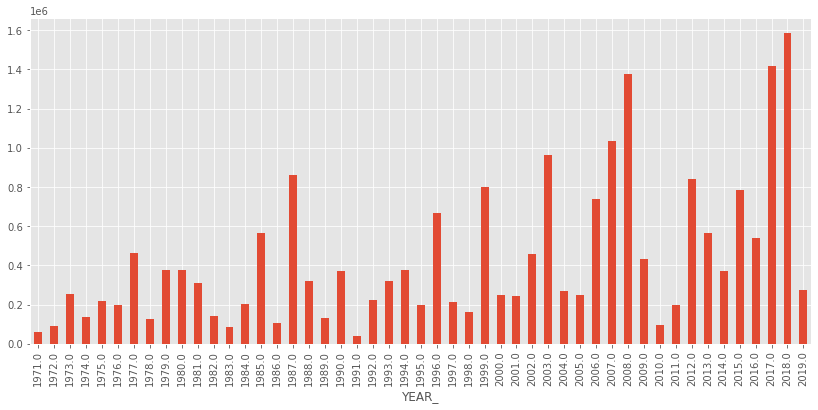

In [7]:
plt.subplots(figsize=(14, 6))
acres_df.groupby('YEAR_')['GIS_ACRES'].sum().plot(kind='bar');

In [8]:
y = acres_df.groupby('YEAR_')['GIS_ACRES'].sum().reset_index(drop=True)
y

0     5.840246e+04
1     9.047300e+04
2     2.554129e+05
3     1.348777e+05
4     2.204632e+05
5     1.973729e+05
6     4.630022e+05
7     1.244833e+05
8     3.752536e+05
9     3.771393e+05
10    3.106954e+05
11    1.407550e+05
12    8.404991e+04
13    2.046338e+05
14    5.656361e+05
15    1.059533e+05
16    8.600583e+05
17    3.185617e+05
18    1.326658e+05
19    3.694520e+05
20    3.876915e+04
21    2.216668e+05
22    3.223491e+05
23    3.746583e+05
24    1.955363e+05
25    6.681590e+05
26    2.148275e+05
27    1.627617e+05
28    7.978210e+05
29    2.466238e+05
30    2.434611e+05
31    4.584086e+05
32    9.652634e+05
33    2.694237e+05
34    2.500537e+05
35    7.399271e+05
36    1.033393e+06
37    1.375213e+06
38    4.309091e+05
39    9.731910e+04
40    1.968535e+05
41    8.419112e+05
42    5.648177e+05
43    3.733814e+05
44    7.847164e+05
45    5.402921e+05
46    1.415352e+06
47    1.584802e+06
48    2.753229e+05
Name: GIS_ACRES, dtype: float64

In [9]:
y_train, y_test = temporal_train_test_split(y, test_size=12)

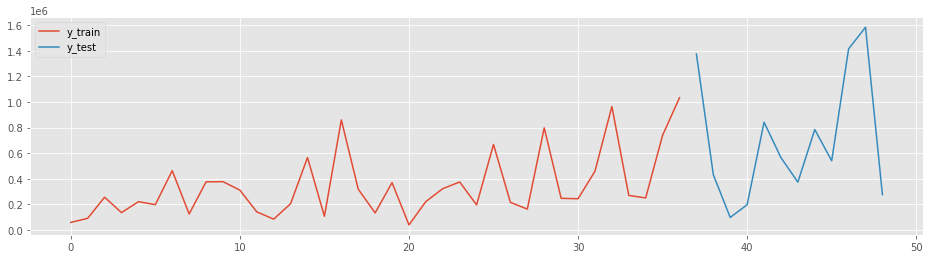

In [10]:
plot_ys(y_train, y_test, labels=['y_train', 'y_test']);

In [11]:
naive_model_mean = NaiveForecaster(strategy='mean')
naive_model_mean.fit(y_train)
y_preds_mean = naive_model_mean.predict(list(range(1, len(y_test)+1)))
mean_absolute_error(y_test, y_preds_mean)

441656.8088646172

In [12]:
naive_model_season = NaiveForecaster(strategy='last', sp=10)
naive_model_season.fit(y_train)
y_preds_season = naive_model_season.predict(list(range(1, len(y_test)+1)))
mean_absolute_error(y_test, y_preds_season)

476998.0518000001

In [13]:
sarima_model = AutoARIMA(sp=10, suppress_warnings=True)
sarima_model.fit(y_train)
y_preds_sarima = sarima_model.predict(list(range(1, len(y_test)+1)))
mean_absolute_error(y_test, y_preds_sarima)

451972.1469874287

In [14]:
hw_model = AutoETS(auto=True, sp=10)
hw_model.fit(y_train.astype('float'))
y_preds_hw = hw_model.predict(list(range(1, len(y_test)+1)))
mean_absolute_error(y_test, y_preds_hw)

450877.5773251289

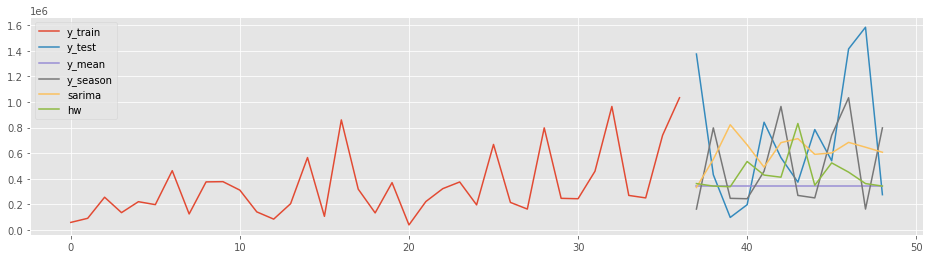

In [15]:
plot_ys(y_train, y_test, y_preds_mean, y_preds_season, y_preds_sarima, y_preds_hw,
        labels=['y_train', 'y_test', 'y_mean', 'y_season', 'sarima', 'hw']);

In [16]:
type(y)

pandas.core.series.Series

In [17]:
# Manually adding 2020, acre count here: https://www.fire.ca.gov/incidents/2020/
y_2020 = y.append(pd.Series([4149345]), ignore_index=True)

In [18]:
y_2020

0     5.840246e+04
1     9.047300e+04
2     2.554129e+05
3     1.348777e+05
4     2.204632e+05
5     1.973729e+05
6     4.630022e+05
7     1.244833e+05
8     3.752536e+05
9     3.771393e+05
10    3.106954e+05
11    1.407550e+05
12    8.404991e+04
13    2.046338e+05
14    5.656361e+05
15    1.059533e+05
16    8.600583e+05
17    3.185617e+05
18    1.326658e+05
19    3.694520e+05
20    3.876915e+04
21    2.216668e+05
22    3.223491e+05
23    3.746583e+05
24    1.955363e+05
25    6.681590e+05
26    2.148275e+05
27    1.627617e+05
28    7.978210e+05
29    2.466238e+05
30    2.434611e+05
31    4.584086e+05
32    9.652634e+05
33    2.694237e+05
34    2.500537e+05
35    7.399271e+05
36    1.033393e+06
37    1.375213e+06
38    4.309091e+05
39    9.731910e+04
40    1.968535e+05
41    8.419112e+05
42    5.648177e+05
43    3.733814e+05
44    7.847164e+05
45    5.402921e+05
46    1.415352e+06
47    1.584802e+06
48    2.753229e+05
49    4.149345e+06
dtype: float64

In [19]:
naive_model_season_ext = NaiveForecaster(strategy='last', sp=4)
naive_model_season_ext.fit(y_2020)
y_preds_season_ext = naive_model_season_ext.predict(list(range(1, 6)))

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

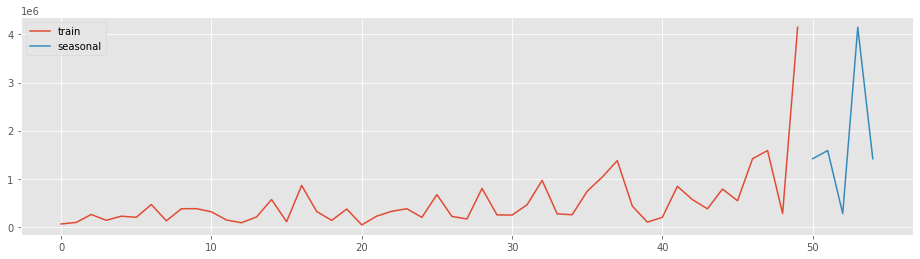

In [20]:
plot_ys(y_2020, y_preds_season_ext, labels = ['train', 'seasonal'])

In [21]:
y_preds_season_ext

50    1.415352e+06
51    1.584802e+06
52    2.753229e+05
53    4.149345e+06
54    1.415352e+06
dtype: float64

In [22]:
predictions_df = pd.DataFrame(y_preds_season_ext, columns=['pred_acres'])

In [23]:
predictions_df['pred_cost'] = predictions_df['pred_acres'] * 4282.14

In [24]:
predictions_df['year'] = [2021, 2022, 2023, 2024, 2025]

In [25]:
# source: https://re-thought.com/how-to-suppress-scientific-notation-in-pandas/

pd.set_option('display.float_format', lambda x: '%.2f' % x)
predictions_df

,pred_acres,pred_cost,year
50,1415351.63,6060733837.71,2021
51,1584802.48,6786346089.57,2022
52,275322.93,1178971331.81,2023
53,4149345.00,17768076198.30,2024
54,1415351.63,6060733837.71,2025


In [26]:
# Source: https://pbpython.com/styling-pandas.html
format_dict = {'pred_acres': '{0:,.0f}', 'pred_cost':'${0:,.0f}'}
predictions_df.style.format(format_dict).hide_index()

pred_acres,pred_cost,year
"1,415,352","$6,060,733,838",2021
"1,584,802","$6,786,346,090",2022
"275,323","$1,178,971,332",2023
"4,149,345","$17,768,076,198",2024
"1,415,352","$6,060,733,838",2025


In [27]:
predictions_df = predictions_df[['year', 'pred_acres', 'pred_cost']]
predictions_df.style.format(format_dict).hide_index()

year,pred_acres,pred_cost
2021,"1,415,352","$6,060,733,838"
2022,"1,584,802","$6,786,346,090"
2023,"275,323","$1,178,971,332"
2024,"4,149,345","$17,768,076,198"
2025,"1,415,352","$6,060,733,838"


In [28]:
# Source: https://ww3.arb.ca.gov/cc/inventory/pubs/ca_wildfire_co2_emissions_estimates.pdf
emissions_df = pd.DataFrame()

emissions_df['Year'] = list(range(2000, 2020))
emissions_df['CO2_emissions'] = [6.1, 6.7, 13.9, 19.2, 5.4, 2.1, 15.2, 22.8, 45.7,
                                9.6, 1.4, 3.5, 15.9, 19.2, 21.2, 22.9, 14.4, 36.7,
                                45.5, 6.5]
emissions_df['PM10_emissions'] = [87, 99, 188, 153, 57, 16, 176, 219, 675, 101, 
                                  15, 43, 226, 277, 333, 320, 195, 469, 598, 83]
emissions_df['PM25_emissions'] = [74, 84, 160, 129, 48, 13, 149, 186, 572, 86,
                                 13, 36, 191, 235, 282, 272, 166, 397, 507, 70]

emissions_df

,Year,CO2_emissions,PM10_emissions,PM25_emissions
0,2000,6.10,87,74
1,2001,6.70,99,84
2,2002,13.90,188,160
3,2003,19.20,153,129
4,2004,5.40,57,48
5,2005,2.10,16,13
6,2006,15.20,176,149
7,2007,22.80,219,186
8,2008,45.70,675,572
9,2009,9.60,101,86


In [29]:
y = emissions_df['CO2_emissions']
y_train, y_test = temporal_train_test_split(y, test_size=6)

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

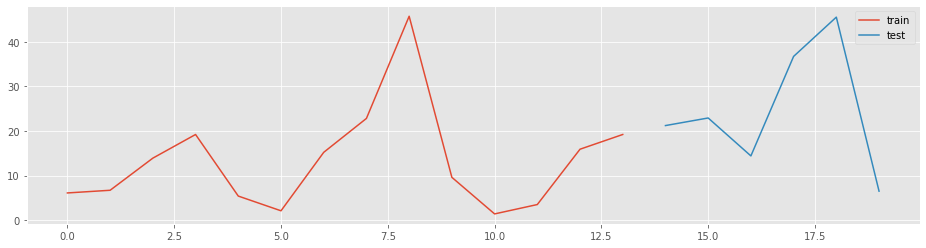

In [30]:
plot_ys(y_train, y_test, labels=['train', 'test'])

In [40]:
naive_model_season = NaiveForecaster(strategy='last', sp=10)
naive_model_season.fit(y_train)
y_preds_season = naive_model_season.predict(list(range(1, len(y_test)+1)))
mean_absolute_error(y_test, y_preds_season)

9.1

In [43]:
hw_model = AutoETS(auto=True, sp=5)
hw_model.fit(y_train.astype('float'))
y_preds_hw = hw_model.predict(list(range(1, len(y_test)+1)))
mean_absolute_error(y_test, y_preds_hw)

16.61314642443548

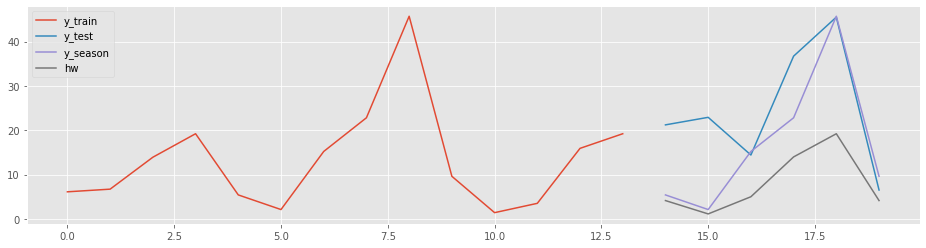

In [45]:
plot_ys(y_train, y_test, y_preds_season, y_preds_hw,
        labels=['y_train', 'y_test', 'y_season', 'hw']);

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

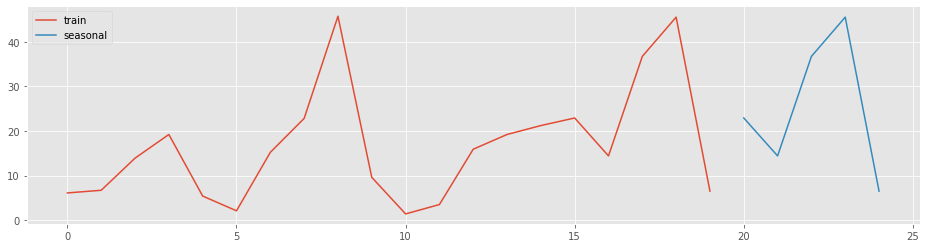

In [50]:
naive_model_season = NaiveForecaster(strategy='last', sp=5)
naive_model_season.fit(y)
y_preds_season_est = naive_model_season.predict(list(range(1, 6)))
plot_ys(y, y_preds_season_est, labels = ['train', 'seasonal'])